In [3]:
import numpy as np
import matplotlib.pyplot as plt


## The advection diffusion equation:

$$\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = 0$$
 
 Here $u(x,t)$ denotes concentrtion of hieght of field, and $v \frac{\partial u}{\partial x}$ desceibes the advection term ie wind/current at velocity $v$. 
 
We **CANNOT** solve using FCTS so instead we use the upwind method:

$$u^{j+1}_i = u^j_i - \frac{c \Delta t}{\Delta x} (u^j_i -u_{i-1}^j)$$

with Von-Neumann stability

$$\Delta t < \frac{\Delta x}{c}$$

and progress with RK4


In [6]:
## parameters:
L = 5.0
c = 2.0

## IC
sigma = 0.1
amplitude = 5.0
x0 = L/4
t_final = 3



## discretization stuff:
nx = 200
dx = L / (nx - 1)

dt = dx/c
nt = int(t_final/dt) + 1

nt

239

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

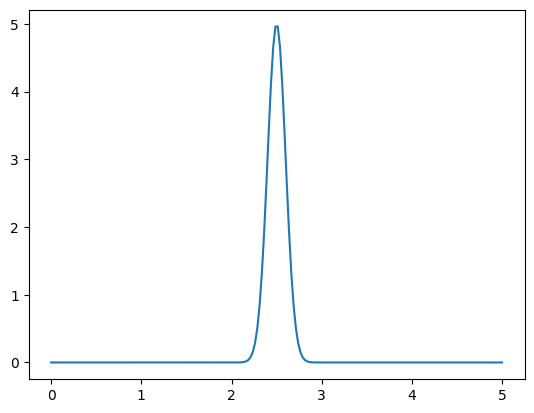

In [8]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

print(u[:,0])##  time array
print(u[0,:]) ## initial position array

u[0,:] = amplitude*np.exp(-(x-L/2)**2/(2*sigma**2))

# Apply Dirichlet boundary conditions
u[0, 0] = 0
u[0, -1] = 0
u[0,:]

plt.plot(x, u[0,:])

In [14]:
for j in range(0, nt-1):
    # we need arrays for each k stage:
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    for i in range(1, nx-1):
        k1[i] =  -c * (u[j, i] - u[j, i-1]) / dx
    
    # k2s:
    u_temp = u[j,:] + (dt/2)*k1
    u_temp[0] = 0 # dirichlet
    u_temp[-1] = 0
    for i in range(1, nx-1):
        k2[i] =  -c * (u_temp[i] - u_temp[i-1]) / dx

    # k3s:
    u_temp = u[j,:] + (dt/2)*k2
    u_temp[0] = 0 # dirichlet
    u_temp[-1] = 0
    for i in range(1, nx-1):
        k3[i] =  -c * (u_temp[i] - u_temp[i-1]) / dx
    
    # k4s:
    u_temp = u[j, :] + dt * k3
    u_temp[0] = 0
    u_temp[-1] = 0
    for i in range(1, nx-1):
        k4[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    
    u[j+1, :] = u[j, :] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    u[j+1, 0] = 0
    u[j+1, -1] = 0

    if j % 100 == 0:
        total_mass = np.sum(u[j, 1:-1]) * dx  # Only interior points
        print(f"j={j}, total mass={total_mass:.4f}")


j=0, total mass=1.2533
j=100, total mass=0.5869
j=200, total mass=0.0000


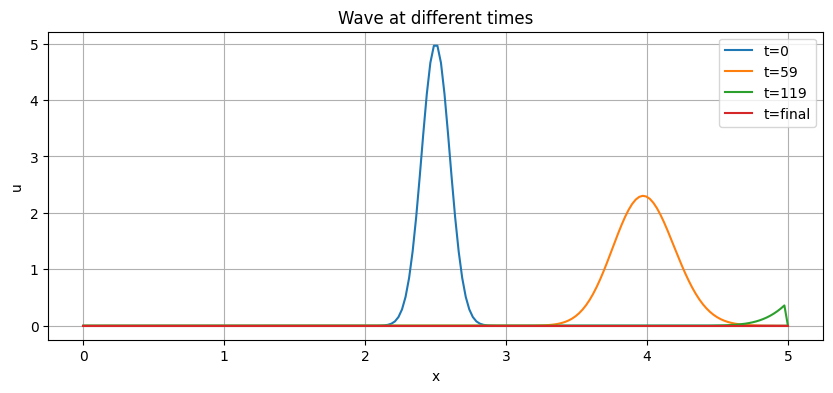

In [15]:

# Plot a few time snapshots
plt.figure(figsize=(10, 4))
plt.plot(x, u[0, :], label='t=0')
plt.plot(x, u[nt//4, :], label=f't={nt//4}')
plt.plot(x, u[nt//2, :], label=f't={nt//2}')
plt.plot(x, u[-1, :], label='t=final')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.title('Wave at different times')
plt.show()

In [17]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-4, amplitude + amplitude/6)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('linear_adjective_1D.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


### now the trickier neumann bc

In [27]:
## parameters:
L = 5.0
c = 2.0

## IC
sigma = 0.1
amplitude = 5.0
x0 = L/4
t_final = 3



## discretization stuff:
nx = 800
dx = L / (nx - 1)

dt = dx/c
nt = int(t_final/dt) + 1

nt

959

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

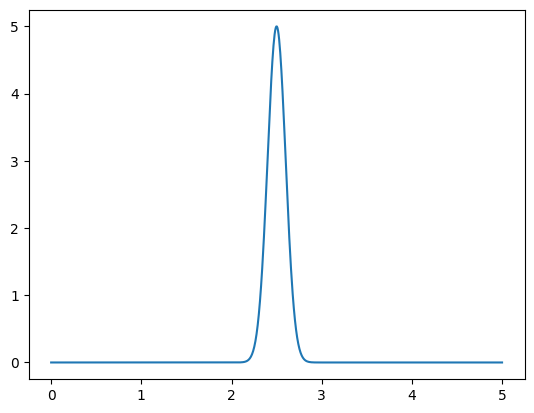

In [28]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

print(u[:,0])##  time array
print(u[0,:]) ## initial position array

u[0,:] = amplitude*np.exp(-(x-L/2)**2/(2*sigma**2))

# Apply Dirichlet boundary conditions
u[0, 0] = u[0, 1]
u[0, -1] = u[0, -2]
u[0,:]

plt.plot(x, u[0,:])

j=0, total mass=1.2533
j=100, total mass=1.2533


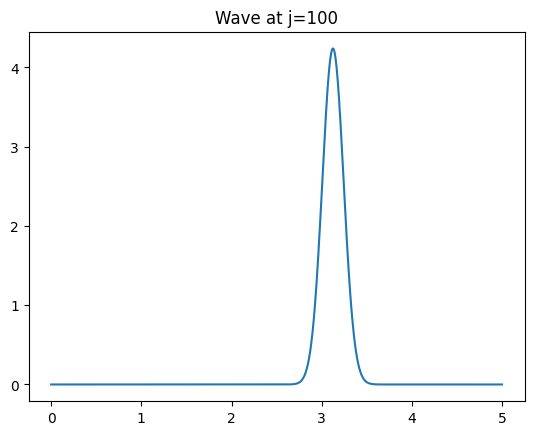

j=200, total mass=1.2533
j=300, total mass=1.2533
j=400, total mass=0.6091
j=500, total mass=0.0001
j=600, total mass=0.0000
j=700, total mass=0.0000
j=800, total mass=0.0000
j=900, total mass=0.0000


In [29]:
for j in range(0, nt-1):
    # we need arrays for each k stage:
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    for i in range(1, nx-1):
        k1[i] =  -c * (u[j, i] - u[j, i-1]) / dx
    
    # k2s:
    u_temp = u[j,:] + (dt/2)*k1
    u_temp[0] = u_temp[1] # neumann
    u_temp[-1] = u_temp[-2]
    for i in range(1, nx-1):
        k2[i] =  -c * (u_temp[i] - u_temp[i-1]) / dx

    # k3s:
    u_temp = u[j,:] + (dt/2)*k2
    u_temp[0] = u_temp[1] # neumann
    u_temp[-1] = u_temp[-2] # neumann
    for i in range(1, nx-1):
        k3[i] =  -c * (u_temp[i] - u_temp[i-1]) / dx
    
    # k4s:
    u_temp = u[j, :] + dt * k3
    u_temp[0] = u_temp[1] # neumann
    u_temp[-1] = u_temp[-2] # neumann
    for i in range(1, nx-1):
        k4[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    
    u[j+1, :] = u[j, :] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    u[j+1, 0] = u[j+1, 1]
    u[j+1, -1] = u[j+1, -2]

    if j % 100 == 0:
        total_mass = np.sum(u[j, 1:-1]) * dx  # Only interior points
        print(f"j={j}, total mass={total_mass:.4f}")
    
    if j == 100:
        plt.plot(x, u[j, :])
        plt.title(f"Wave at j={j}")
        plt.show()

In [30]:
for j in range(nt-1):
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    # k1 - compute only for interior, boundaries stay 0
    for i in range(1, nx-1):
        k1[i] = -c * (u[j, i] - u[j, i-1]) / dx
    # k1[0] and k1[-1] remain 0
    
    # k2
    u_temp = u[j, :] + (dt/2) * k1
    u_temp[0] = u_temp[1]  # Neumann BC
    u_temp[-1] = u_temp[-2]
    for i in range(1, nx-1):
        k2[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k2[0] and k2[-1] remain 0

    # k3
    u_temp = u[j, :] + (dt/2) * k2
    u_temp[0] = u_temp[1]
    u_temp[-1] = u_temp[-2]
    for i in range(1, nx-1):
        k3[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k3[0] and k3[-1] remain 0
    
    # k4
    u_temp = u[j, :] + dt * k3
    u_temp[0] = u_temp[1]
    u_temp[-1] = u_temp[-2]
    for i in range(1, nx-1):
        k4[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k4[0] and k4[-1] remain 0
    
    # Update - interior points evolve, boundaries just follow Neumann
    u[j+1, :] = u[j, :] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    # Enforce Neumann after update
    u[j+1, 0] = u[j+1, 1]
    u[j+1, -1] = u[j+1, -2]

j=0, total mass=1.2533
j=100, total mass=1.2533
j=200, total mass=1.2533
j=300, total mass=1.2533
j=400, total mass=0.6091
j=500, total mass=0.0001
j=600, total mass=0.0000
j=700, total mass=0.0000
j=800, total mass=0.0000
j=900, total mass=0.0000


In [31]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-4, amplitude + amplitude/6)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('linear_adjective_1D_neumann.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


In [34]:
for j in range(nt-1):
    k1 = np.zeros(nx)
    k2 = np.zeros(nx)
    k3 = np.zeros(nx)
    k4 = np.zeros(nx)

    # k1 - compute only for interior, boundaries stay 0
    for i in range(1, nx-1):
        k1[i] = -c * (u[j, i] - u[j, i-1]) / dx
    # k1[0] and k1[-1] remain 0
    
    # k2
    u_temp = u[j, :] + (dt/2) * k1
    u_temp[0] = u_temp[-2] # periodic BC
    u_temp[-1] = u_temp[1] 
    for i in range(1, nx-1):
        k2[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k2[0] and k2[-1] remain 0

    # k3
    u_temp = u[j, :] + (dt/2) * k2
    u_temp[0] = u_temp[-2] # periodic BC
    u_temp[-1] = u_temp[1] 
    for i in range(1, nx-1):
        k3[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k3[0] and k3[-1] remain 0
    
    # k4
    u_temp = u[j, :] + dt * k3
    u_temp[0] = u_temp[-2] # periodic BC
    u_temp[-1] = u_temp[1] 
    for i in range(1, nx-1):
        k4[i] = -c * (u_temp[i] - u_temp[i-1]) / dx
    # k4[0] and k4[-1] remain 0
    
    # Update - interior points evolve, boundaries just follow Neumann
    u[j+1, :] = u[j, :] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    # Enforce Neumann after update
    u[j+1, 0] = u[j+1, -2]
    u[j+1, -1] = u[j+1, 1]


    if j % 100 == 0:
        total_mass = np.sum(u[j, 1:-1]) * dx  # Only interior points
        print(f"j={j}, total mass={total_mass:.4f}")
    

j=0, total mass=1.2533
j=100, total mass=1.2533
j=200, total mass=1.2533
j=300, total mass=1.2533
j=400, total mass=1.2533
j=500, total mass=1.2533
j=600, total mass=1.2533
j=700, total mass=1.2533
j=800, total mass=1.2533
j=900, total mass=1.2533
